In [1]:
import pandas as pd #For data related tasks
import matplotlib.pyplot as plt #for data visualization 
import numpy as np
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn.model_selection import train_test_split

# New York Stock Price Dataset

In [2]:
dataset = pd.read_csv('prices-split-adjusted.csv')
dataset.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


# Data Preprocessing

In [3]:
#cheeck for blank values

dataset.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [4]:
#drop the duplicates and Nan values

dataset.drop_duplicates(inplace = True)
dataset.dropna(inplace = True)

### Correlation with Heatmap

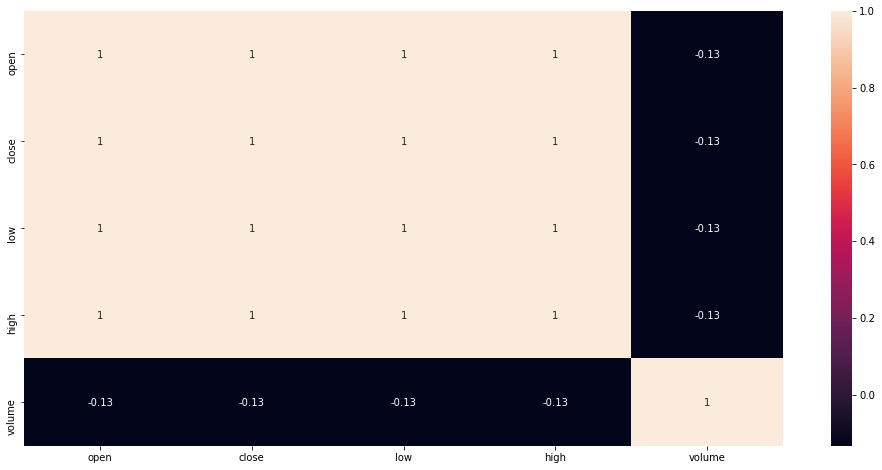

In [5]:
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(dataset.corr(), annot = True)

In [6]:
#specifying the input features and outputs

predictors = dataset.loc[:,'close':'volume']
target = dataset.loc[:,'open']

In [7]:
print(predictors.shape)
print(target.shape)

(851264, 4)
(851264,)


In [8]:
#removing outliers
predictors = predictors[(np.abs(stats.zscore(predictors)) < 2.5).all(axis = 1)]

#arranging according output records according to the new input records
target= target.loc[predictors.index]

In [9]:
#new set of input features and outputs

print(predictors.shape)
print(target.shape)

(820000, 4)
(820000,)


In [10]:
print(predictors.head())
print("-------------------------\n-------------------------")
print(target.head())

        close         low        high     volume
0  125.839996  122.309998  126.250000  2163600.0
1  119.980003  119.940002  125.540001  2386400.0
2  114.949997  114.930000  119.739998  2489500.0
3  116.620003  113.500000  117.440002  2006300.0
4  114.970001  114.089996  117.330002  1408600.0
-------------------------
-------------------------
0    123.430000
1    125.239998
2    116.379997
3    115.480003
4    117.010002
Name: open, dtype: float64


## Train Test Split

In [11]:
#Splitting the data

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(656000, 4)
(164000, 4)
(656000,)
(164000,)


# Implementation of Algorithms and finding Predictions

## Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression().fit(X_train, Y_train)

In [14]:
print("lr.coef_: {}".format(lr.coef_))
print("---------------------------------------------------")
print("lr.intercept_: {}".format(lr.intercept_))
print("---------------------------------------------------")
print("Training set score: {:.2f}".format(lr.score(X_train, Y_train)))
print("---------------------------------------------------")
print("Test set score: {:.2f}".format(lr.score(X_test, Y_test)))
print("---------------------------------------------------")

lr.coef_: [-5.93528709e-01  7.58688010e-01  8.34381271e-01 -1.52991357e-10]
---------------------------------------------------
lr.intercept_: 0.00014654401191904753
---------------------------------------------------
Training set score: 1.00
---------------------------------------------------
Test set score: 1.00
---------------------------------------------------


In [15]:
Y_pred=lr.predict(X_test)

print("Test set predictions:\n{}".format(Y_pred))
print("---------------------------------------------------")
print("Test set R^2: {:.2f}".format(lr.score(X_test, Y_test)))
print("---------------------------------------------------")
print(f"Test set and Prediction R^2: {r2_score(Y_test, Y_pred)}")
print("---------------------------------------------------")
print(f"Root Mean Square Error: {np.sqrt(mean_squared_error(Y_test, Y_pred))}")
print("---------------------------------------------------")
mre = (1/len(Y_test))*(np.sum(np.abs(Y_pred - Y_test)/Y_test))
print("Mean Relative Error: ", mre)
print("---------------------------------------------------")

Test set predictions:
[ 26.43523541  42.8936017   83.63084757 ... 187.83763336  29.4898458
  49.8849894 ]
---------------------------------------------------
Test set R^2: 1.00
---------------------------------------------------
Test set and Prediction R^2: 0.9998705687997207
---------------------------------------------------
Root Mean Square Error: 0.4342339121908846
---------------------------------------------------
Mean Relative Error:  0.00479718625594931
---------------------------------------------------


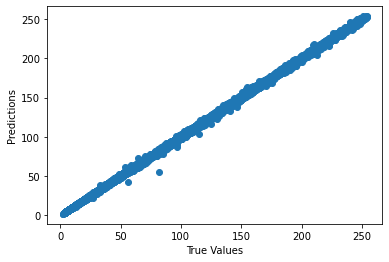

In [16]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

## KNN Regression

### k=1

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
reg = KNeighborsRegressor(n_neighbors=1)

# fit the model using the training data and training targets
reg.fit(X_train, Y_train)


print("---------------------------------------------------")
print("Training set score: {:.2f}".format(reg.score(X_train, Y_train)))
print("---------------------------------------------------")
print("Test set score: {:.2f}".format(reg.score(X_test, Y_test)))
print("---------------------------------------------------")

---------------------------------------------------
Training set score: 1.00
---------------------------------------------------
Test set score: 0.80
---------------------------------------------------


In [19]:
Y_pred=reg.predict(X_test)

print("Test set predictions:\n{}".format(Y_pred))
print("---------------------------------------------------")
print("Test set R^2: {:.2f}".format(reg.score(X_test, Y_test)))
print("---------------------------------------------------")
print(f"Test set and Prediction R^2: {r2_score(Y_test, Y_pred)}")
print("---------------------------------------------------")
print(f"Root Mean Square Error: {np.sqrt(mean_squared_error(Y_test, Y_pred))}")
print("---------------------------------------------------")
mre = (1/len(Y_test))*(np.sum(np.abs(Y_pred - Y_test)/Y_test))
print("Mean Relative Error: ", mre)
print("---------------------------------------------------")

Test set predictions:
[ 63.032856  48.48      52.849998 ... 184.199997  10.02      50.09    ]
---------------------------------------------------
Test set R^2: 0.80
---------------------------------------------------
Test set and Prediction R^2: 0.8008634414446046
---------------------------------------------------
Root Mean Square Error: 17.032552912866343
---------------------------------------------------
Mean Relative Error:  0.25926782129403786
---------------------------------------------------


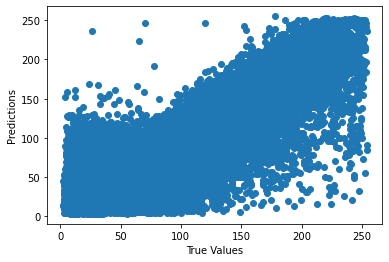

In [20]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

### k=3

In [26]:
reg = KNeighborsRegressor(n_neighbors=3)

# fit the model using the training data and training targets
reg.fit(X_train, Y_train)


print("---------------------------------------------------")
print("Training set score: {:.2f}".format(reg.score(X_train, Y_train)))
print("---------------------------------------------------")
print("Test set score: {:.2f}".format(reg.score(X_test, Y_test)))
print("---------------------------------------------------")

---------------------------------------------------
Training set score: 0.91
---------------------------------------------------
Test set score: 0.78
---------------------------------------------------


In [27]:
Y_pred=reg.predict(X_test)

print("Test set predictions:\n{}".format(Y_pred))
print("---------------------------------------------------")
print("Test set R^2: {:.2f}".format(reg.score(X_test, Y_test)))
print("---------------------------------------------------")
print(f"Test set and Prediction R^2: {r2_score(Y_test, Y_pred)}")
print("---------------------------------------------------")
print(f"Root Mean Square Error: {np.sqrt(mean_squared_error(Y_test, Y_pred))}")
print("---------------------------------------------------")
mre = (1/len(Y_test))*(np.sum(np.abs(Y_pred - Y_test)/Y_test))
print("Mean Relative Error: ", mre)
print("---------------------------------------------------")

Test set predictions:
[ 36.76095167  45.05333333  33.10376877 ... 176.19666533  46.86047748
  48.78999967]
---------------------------------------------------
Test set R^2: 0.78
---------------------------------------------------
Test set and Prediction R^2: 0.7813039828188515
---------------------------------------------------
Root Mean Square Error: 17.849443686116164
---------------------------------------------------
Mean Relative Error:  0.30006767178883376
---------------------------------------------------


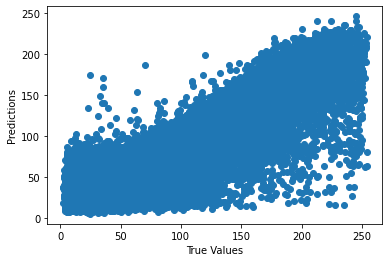

In [28]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

### k=6

In [29]:
reg = KNeighborsRegressor(n_neighbors=6)

# fit the model using the training data and training targets
reg.fit(X_train, Y_train)


print("---------------------------------------------------")
print("Training set score: {:.2f}".format(reg.score(X_train, Y_train)))
print("---------------------------------------------------")
print("Test set score: {:.2f}".format(reg.score(X_test, Y_test)))
print("---------------------------------------------------")

---------------------------------------------------
Training set score: 0.82
---------------------------------------------------
Test set score: 0.72
---------------------------------------------------


In [30]:
Y_pred=reg.predict(X_test)

print("Test set predictions:\n{}".format(Y_pred))
print("---------------------------------------------------")
print("Test set R^2: {:.2f}".format(reg.score(X_test, Y_test)))
print("---------------------------------------------------")
print(f"Test set and Prediction R^2: {r2_score(Y_test, Y_pred)}")
print("---------------------------------------------------")
print(f"Root Mean Square Error: {np.sqrt(mean_squared_error(Y_test, Y_pred))}")
print("---------------------------------------------------")
mre = (1/len(Y_test))*(np.sum(np.abs(Y_pred - Y_test)/Y_test))
print("Mean Relative Error: ", mre)
print("---------------------------------------------------")

Test set predictions:
[ 35.44214283  49.3399995   26.64060934 ... 170.13833117  41.59357174
  48.92666683]
---------------------------------------------------
Test set R^2: 0.72
---------------------------------------------------
Test set and Prediction R^2: 0.721052978255471
---------------------------------------------------
Root Mean Square Error: 20.158820254927566
---------------------------------------------------
Mean Relative Error:  0.3628589334905167
---------------------------------------------------


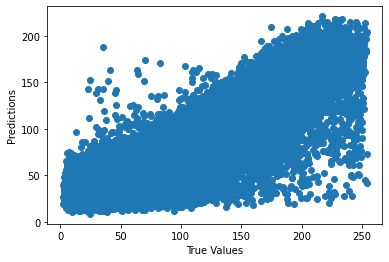

In [31]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

### k=9

In [32]:
reg = KNeighborsRegressor(n_neighbors=9)

# fit the model using the training data and training targets
reg.fit(X_train, Y_train)


print("---------------------------------------------------")
print("Training set score: {:.2f}".format(reg.score(X_train, Y_train)))
print("---------------------------------------------------")
print("Test set score: {:.2f}".format(reg.score(X_test, Y_test)))
print("---------------------------------------------------")

---------------------------------------------------
Training set score: 0.75
---------------------------------------------------
Test set score: 0.67
---------------------------------------------------


In [33]:
Y_pred=reg.predict(X_test)

print("Test set predictions:\n{}".format(Y_pred))
print("---------------------------------------------------")
print("Test set R^2: {:.2f}".format(reg.score(X_test, Y_test)))
print("---------------------------------------------------")
print(f"Test set and Prediction R^2: {r2_score(Y_test, Y_pred)}")
print("---------------------------------------------------")
print(f"Root Mean Square: {np.sqrt(mean_squared_error(Y_test, Y_pred))}")
print("---------------------------------------------------")
mre = (1/len(Y_test))*(np.sum(np.abs(Y_pred - Y_test)/Y_test))
print("Mean Relative Error: ", mre)
print("---------------------------------------------------")

Test set predictions:
[ 35.74254     47.25222211  28.6951282  ... 153.74777656  34.03904771
  51.06      ]
---------------------------------------------------
Test set R^2: 0.67
---------------------------------------------------
Test set and Prediction R^2: 0.671183983450327
---------------------------------------------------
Root Mean Square: 21.886722417863563
---------------------------------------------------
Mean Relative Error:  0.40519166913619076
---------------------------------------------------


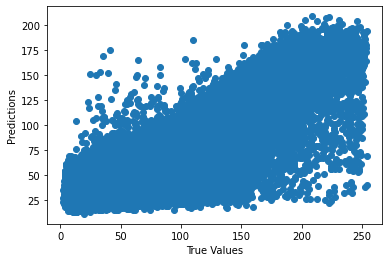

In [34]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

## Lasso Regression

In [35]:
from sklearn.linear_model import Lasso

In [36]:
las = Lasso(alpha=1.0)
# fit model
las.fit(X_train, Y_train)

print("---------------------------------------------------")
print("Training set score: {:.2f}".format(las.score(X_train, Y_train)))
print("---------------------------------------------------")
print("Test set score: {:.2f}".format(las.score(X_test, Y_test)))
print("---------------------------------------------------")

---------------------------------------------------
Training set score: 1.00
---------------------------------------------------
Test set score: 1.00
---------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196674.3257008458, tolerance: 96109.8179970626
  positive)


In [37]:
Y_pred=las.predict(X_test)

print("Test set predictions:\n{}".format(Y_pred))
print("---------------------------------------------------")
print("Test set R^2: {:.2f}".format(las.score(X_test, Y_test)))
print("---------------------------------------------------")
print(f"Test set and Prediction R^2: {r2_score(Y_test, Y_pred)}")
print("---------------------------------------------------")
print(f"Root Mean Square Error: {np.sqrt(mean_squared_error(Y_test, Y_pred))}")
print("---------------------------------------------------")
mre = (1/len(Y_test))*(np.sum(np.abs(Y_pred - Y_test)/Y_test))
print("Mean Relative Error: ", mre)
print("---------------------------------------------------")

Test set predictions:
[ 26.52979095  43.09600416  80.58998713 ... 186.06103817  29.11695043
  50.45899833]
---------------------------------------------------
Test set R^2: 1.00
---------------------------------------------------
Test set and Prediction R^2: 0.9995658107577815
---------------------------------------------------
Root Mean Square Error: 0.7953234311975506
---------------------------------------------------
Mean Relative Error:  0.00901136073197267
---------------------------------------------------


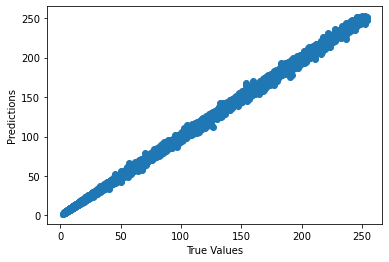

In [38]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

## Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
rf.fit(X_train, Y_train)

print("---------------------------------------------------")
print("Training set score: {:.2f}".format(rf.score(X_train, Y_train)))
print("---------------------------------------------------")
print("Test set score: {:.2f}".format(rf.score(X_test, Y_test)))
print("---------------------------------------------------")

---------------------------------------------------
Training set score: 1.00
---------------------------------------------------
Test set score: 1.00
---------------------------------------------------


In [41]:
Y_pred=rf.predict(X_test)

print("Test set predictions:\n{}".format(Y_pred))
print("---------------------------------------------------")
print("Test set R^2: {:.2f}".format(rf.score(X_test, Y_test)))
print("---------------------------------------------------")
print(f"Test set and Prediction R^2: {r2_score(Y_test, Y_pred)}")
print("---------------------------------------------------")
print(f"Root Mean Square: {np.sqrt(mean_squared_error(Y_test, Y_pred))}")
print("---------------------------------------------------")
mre = (1/len(Y_test))*(np.sum(np.abs(Y_pred - Y_test)/Y_test))
print("Mean Relative Error: ", mre)
print("---------------------------------------------------")

Test set predictions:
[ 26.21349523  42.95876151  81.87409972 ... 187.43489885  29.46398551
  49.90984052]
---------------------------------------------------
Test set R^2: 1.00
---------------------------------------------------
Test set and Prediction R^2: 0.9998637265618401
---------------------------------------------------
Root Mean Square: 0.44556375434430556
---------------------------------------------------
Mean Relative Error:  0.00494985808652769
---------------------------------------------------


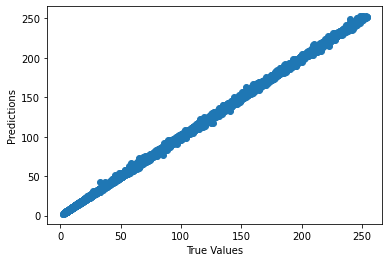

In [42]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

# Support Vector Regressor

In [13]:
# from sklearn.svm import SVR

In [ ]:
# # most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. 
# #We have a non-linear condition #so we can select polynomial or gaussian 
# #but here we select RBF(a #gaussian type) kernel.

# svr = SVR(kernel='rbf')

# svr.fit(X_train, Y_train)

# print("---------------------------------------------------")
# print("Training set score: {:.2f}".format(rf.score(X_train, Y_train)))
# print("---------------------------------------------------")
# print("Test set score: {:.2f}".format(rf.score(X_test, Y_test)))
# print("---------------------------------------------------")

In [ ]:
# Y_pred=svr.predict(X_test)

# print("Test set predictions:\n{}".format(Y_pred))
# print("---------------------------------------------------")
# print("Test set R^2: {:.2f}".format(svr.score(X_test, Y_test)))
# print("---------------------------------------------------")
# print(f"r^2: {r2_score(Y_test, Y_pred)}")
# print("---------------------------------------------------")
# print(f"rmse: {np.sqrt(mean_squared_error(Y_test, Y_pred))}")
# print("---------------------------------------------------")
# mre = (1/len(Y_test))*(np.sum(np.abs(Y_pred - Y_test)/Y_test))
# print("Mean Relative Error: ", mre)
# print("---------------------------------------------------")

In [ ]:
# plt.scatter(Y_test, Y_pred)
# plt.xlabel("True Values")
# plt.ylabel("Predictions")
# plt.show()

# Cross Validations

In [48]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import absolute

In [56]:
#specifying the new input features and outputs sample for LOOCV

predictors = predictors[:10000]
target = target[:10000]
print(predictors.shape)
print(target.shape)

(10000, 4)
(10000,)


In [59]:
# cv = KFold(n_splits=10, random_state=1, shuffle=True)
cv = LeaveOneOut()
#create model
lr = LinearRegression()

#evaluate model
scores= cross_val_score(lr, predictors, target, scoring='r2', cv=cv, n_jobs=-1)

# force positive
scores = absolute(scores)

# report performance
print("LINEAR REGRESSION \n")
print(f"R^2: {mean(scores), std(scores)}")
print("---------------------------------------------------")

scores= cross_val_score(lr, predictors, target, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

# force positive
scores = absolute(scores)
print(f"Root Mean Square Error: {mean(scores), std(scores)}")

LINEAR REGRESSION 

R^2: (nan, nan)
---------------------------------------------------
Root Mean Square Error: (0.21991732786528193, 0.2744603538768282)


In [61]:
cv = LeaveOneOut()
#create model
#  AT K=1
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=1)
#evaluate model
scores= cross_val_score(reg, predictors, target, scoring='r2', cv=cv, n_jobs=-1)

# force positive
scores = absolute(scores)

# report performance
print("KNN REGRESSION at K=1 \n")
print(f"R^2: {mean(scores), std(scores)}")
print("---------------------------------------------------")

scores= cross_val_score(reg, predictors, target, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

# force positive
scores = absolute(scores)
print(f"Root Mean Square Error: {mean(scores), std(scores)}")

KNN REGRESSION at K=1 

R^2: (nan, nan)
---------------------------------------------------
Root Mean Square Error: (23.71851397314842, 25.60182822421828)


In [62]:
cv = LeaveOneOut()
#create model
#  AT K=3
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=3)
#evaluate model
scores= cross_val_score(reg, predictors, target, scoring='r2', cv=cv, n_jobs=-1)

# force positive
scores = absolute(scores)

# report performance
print("KNN REGRESSION at K=3 \n")
print(f"R^2: {mean(scores), std(scores)}")
print("---------------------------------------------------")

scores= cross_val_score(reg, predictors, target, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

# force positive
scores = absolute(scores)
print(f"Root Mean Square Error: {mean(scores), std(scores)}")

KNN REGRESSION at K=3 

R^2: (nan, nan)
---------------------------------------------------
Root Mean Square Error: (20.67060023822427, 21.182405923523074)


In [63]:
cv = LeaveOneOut()
#create model
#  AT K=6
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=6)
#evaluate model
scores= cross_val_score(reg, predictors, target, scoring='r2', cv=cv, n_jobs=-1)

# force positive
scores = absolute(scores)

# report performance
print("KNN REGRESSION at K=6 \n")
print(f"R^2: {mean(scores), std(scores)}")
print("---------------------------------------------------")

scores= cross_val_score(reg, predictors, target, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

# force positive
scores = absolute(scores)
print(f"Root Mean Square Error: {mean(scores), std(scores)}")

KNN REGRESSION at K=6 

R^2: (nan, nan)
---------------------------------------------------
Root Mean Square Error: (19.67857438480826, 20.093962760737668)


In [64]:
cv = LeaveOneOut()
#create model
#  AT K=9
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=9)
#evaluate model
scores= cross_val_score(reg, predictors, target, scoring='r2', cv=cv, n_jobs=-1)

# force positive
scores = absolute(scores)

# report performance
print("KNN REGRESSION at K=9 \n")
print(f"R^2: {mean(scores), std(scores)}")
print("---------------------------------------------------")

scores= cross_val_score(reg, predictors, target, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

# force positive
scores = absolute(scores)
print(f"Root Mean Square Error: {mean(scores), std(scores)}")

KNN REGRESSION at K=9 

R^2: (nan, nan)
---------------------------------------------------
Root Mean Square Error: (19.29516418549538, 19.71166931240028)


In [65]:
from sklearn.linear_model import Lasso
cv = LeaveOneOut()
#create model
las = Lasso(alpha=1.0)
#evaluate model
scores= cross_val_score(las, predictors, target, scoring='r2', cv=cv, n_jobs=-1)

# force positive
scores = absolute(scores)

# report performance
print("LASSO REGRESSION \n")
print(f"R^2: {mean(scores), std(scores)}")
print("---------------------------------------------------")

scores= cross_val_score(las, predictors, target, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

# force positive
scores = absolute(scores)
print(f"Root Mean Square Error: {mean(scores), std(scores)}")

LASSO REGRESSION 

R^2: (nan, nan)
---------------------------------------------------
Root Mean Square Error: (0.3906194130425485, 0.4806090090444637)


In [21]:
# from sklearn.ensemble import RandomForestRegressor
# cv = LeaveOneOut()
# #create model
# rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
# #evaluate model
# scores= cross_val_score(rf, predictors, target, scoring='r2', cv=cv, n_jobs=-1)

# # force positive
# scores = absolute(scores)

# # report performance
# print("RANDOM FOREST REGRESSOR \n")
# print(f"R^2: {mean(scores), std(scores)}")
# print("---------------------------------------------------")

# scores= cross_val_score(rf, predictors, target, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

# # force positive
# scores = absolute(scores)
# print(f"Root Mean Square Error: {mean(scores), std(scores)}")